In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [64]:
file = open('results.3d_theory/ecc_sup_N=100_N01xN01xN01_representation.pickle', 'rb')
dat = pickle.load(file)

In [3]:
alpha = 0.05
dat_sig = np.load('results.3d_theory/ecc_sup_N=100_N01xN01xN01_signature_distance_matrix.npy')
q = np.quantile(dat_sig, 1-alpha)
#plt.hist(dat_sig)

In [2]:
def get_q(dist_label, N, alpha=0.05):
    filename = f'results.3d_theory/ecc_sup_N={N}_{dist_label}_signature_distance_matrix.npy'
    #print(filename)
    dat = np.load(filename)
    q = np.quantile(dat, 1-alpha)
    return q

In [12]:
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500]
labels = ['N01xN01xN01', 'T3xT3xT3', 'UxUxU', 'B22xB22xB22']
qs = {}
for label in labels:
    qs[label] = []
    for N in Ns:
        q=get_q(label, N=N)
        qs[label].append([N, q])

Text(0, 0.5, 'threshold')

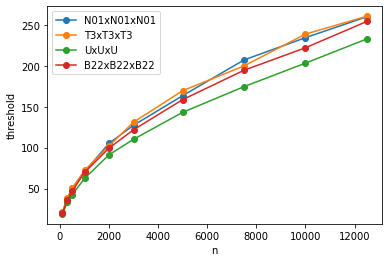

In [13]:
for label in qs.keys():
    val = np.array(qs[label])
    plt.plot(val[:, 0], val[:, 1], 'o-', label=label)
plt.legend()
plt.xlabel('n')
plt.ylabel('threshold')

In [5]:
from collections import defaultdict

Text(0.5, 1.0, 'True: N01xN01xN01')

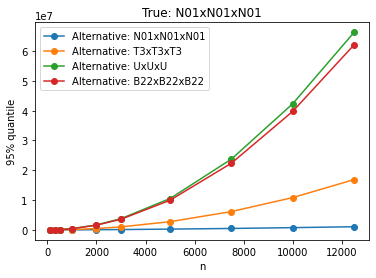

In [11]:
res = defaultdict(list)
true_distrib='N01xN01xN01'
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500]
for N in Ns:
    file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
    dat = pickle.load(file)
    ecc_mean = np.mean(dat[7][true_distrib], axis=0)
    for key in dat[7].keys():
        q = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=0.95)
        res[key].append([N, q*N**1/3])

for key in res:
    x = np.array(res[key])
    plt.plot(x[:, 0], x[:, 1], 'o-', label=f'Alternative: {key}')
plt.legend()
plt.xlabel('n')
plt.ylabel('95% quantile')
#plt.yscale('log')
plt.title(f'True: {true_distrib}')

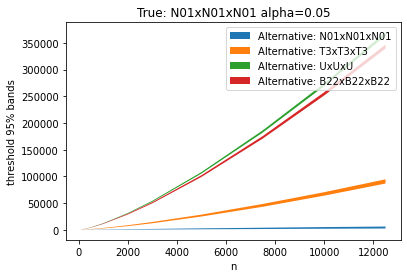

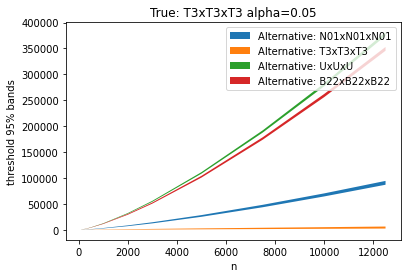

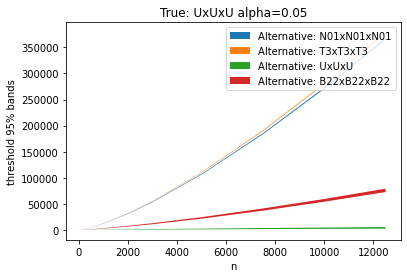

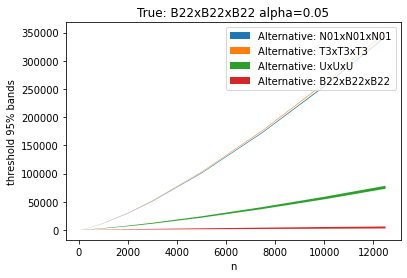

<Figure size 432x288 with 0 Axes>

In [14]:
true_distribs=['N01xN01xN01', 'T3xT3xT3', 'UxUxU', 'B22xB22xB22']
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500]
alpha=0.05
for true_distrib in true_distribs:
    res = defaultdict(list)
    for N in Ns:
        file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
        dat = pickle.load(file)
        ecc_mean = np.mean(dat[7][true_distrib], axis=0)
        for key in dat[7].keys():
            q_low = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=alpha/2)*N**(1/3)
            q_up = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=1-alpha/2)*N**(1/3)
            res[key].append([N, q_low, q_up])
    for key_id, key in enumerate(res):
        x = np.array(res[key])
        #plt.plot(x[:, 0], x[:, 1], 'o-', label=f'Alternative: {key}', color=colors[key_id])
        #plt.plot(x[:, 0], x[:, 2], 'o-', color=colors[key_id])
        plt.fill_between(x[:, 0], x[:, 1], x[:, 2], label=f'Alternative: {key}')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('threshold 95% bands')
    plt.title(f'True: {true_distrib} alpha={alpha}')
    plt.show()
    plt.clf()

(0.0, 1.0)

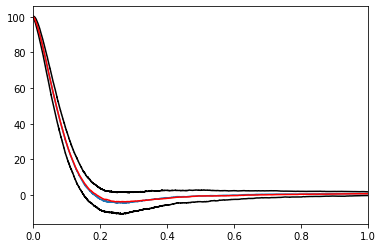

In [96]:
plt.plot(dat[0], dat[1])
plt.plot(dat[0], dat[1]+dat[3], color='black')
plt.plot(dat[0], dat[1]-dat[3], color='black')
plt.plot(x,y,color='red')
plt.xlim((0, 1))

(0.0, 1.0)

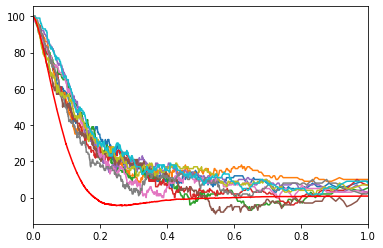

In [59]:
for k in range(10):
    plt.plot(dat[6], dat[7]['T3xT3xT3'][k])
plt.plot(dat[0], dat[1], color='red')
plt.xlim((0, 1))